# xcube JupyterLab Integration

This Notebook demonstrates how to use the features of the xcube JupyterLab integration.
The Notebook demonstrates two scenarios how xcube Viewer is utilized in JupyterLab.
In particular, we open xcube Viewer for any `xarray.Dataset` instances 

1. opened or otherwise created in this Notebook (in-memory datasets);
2. persisted in this Notebooks's workspace or from other sources (saved datasets).

For this to work, the following requirements must be satisfied:

* xcube version must be >= 1.0.2
* JupyterLab version must be >= 3.4
* The xcube JupyterLab extension [xcube-jl-ext](https://github.com/dcs4cop/xcube-jl-ext) 
  must be installed and enabled.
* This example uses the xcube data store `ccizarr` which requires the
  [xcube-cci](https://github.com/dcs4cop/xcube-cci) plugin to be installed too. 
  However, in priciple, you can use any other xcube data store, such as `cciodp`, `cmems`, 
  `sentinelhub`, `s3` or `file`.

If you run JupyterLab remotely, e.g., with JupyterHub, then also

* the [jupyter-proxy](https://jupyter-server-proxy.readthedocs.io/en/latest/#) 
  server extension must be installed and enabled.

In [1]:
import numpy as np
import xarray as xr

from xcube.webapi.viewer import Viewer
from xcube.core.store import new_data_store
from xcube.core.select import select_subset

We create some datasets so we have something to show. We use the xcube datastore framework here to open the dataset, but it could also be opened by other means, e.g., `xr.open_dataset()`, provided it has variables with dimensions ["time", "y", "x"] or ["y", "x"]. 

In [2]:
store = new_data_store("ccizarr")
store.list_data_ids()

['ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2018-fv2.0.zarr',
 'ESACCI-GHG-L2-CH4-SCIAMACHY-WFMD-2002-2011-fv1.zarr',
 'ESACCI-GHG-L2-CO2-SCIAMACHY-WFMD-2002-2012-fv1.zarr',
 'ESACCI-ICESHEETS_Antarctica_GMB-2002-2016-v1.1.zarr',
 'ESACCI-ICESHEETS_Greenland_GMB-2003-2016-v1.1.zarr',
 'ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-1982-2016-fv3.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr',
 'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr',
 'ESACCI-LAKES-L3S-LK_PRODUCTS-MERGED-1992-09-fv2.0.1.zarr',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_DAY-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_NIGHT-2002-2018-fv3.00.zarr',
 'ESACCI-OC-L3S-IOP-MERGED-1M_MONTHLY_4km_GEO_PML_OCx_QAA-1997-2020-fv5.0.zarr',
 'ESACCI-PERMAFROST-L4-ALT-MODISLST-AREA4_PP-1997-2018-fv02.0.zarr',
 'ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-2002-2012-fv2.0.zarr',
 'ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-NH25KM

In [3]:
dataset = store.open_data('ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr')
dataset

<xarray.Dataset>
Dimensions:             (time: 12784, lat: 720, lon: 1440, fields: 16,
                         field_name_length: 50, fieldsp1: 17)
Coordinates:
  * field_name_length   (field_name_length) int32 1 2 3 4 5 6 ... 46 47 48 49 50
  * fields              (fields) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * fieldsp1            (fieldsp1) int32 1 2 3 4 5 6 7 ... 11 12 13 14 15 16 17
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time                (time) datetime64[ns] 1982-01-01T12:00:00 ... 2016-12...
Data variables:
    analysed_sst        (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    analysis_number     (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    anomaly_fields      (time, fields, lat, lon) float32 dask.array<chunksize=(16, 16, 720, 720), meta=np.ndarray>
    field_name          (fields, field_name_length) |S1 dask.array<chunksize=(16, 50), meta=np.ndarray>
    gradient_fields     (time, fieldsp1, lat, lon) float32 dask.array<chunksize=(16, 17, 720, 720), meta=np.ndarray>
    median_type         (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    standard_deviation  (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.4
    acknowledgment:             Funded by ESA
    cdm_data_type:              grid
    comment:                    
    creator_email:              science.leader@esa-sst-cci.org
    creator_name:               SST_cci
    ...                         ...
    summary:                    An ensemble product with input from a number ...
    time_coverage_end:          20170101T000000Z
    time_coverage_start:        20161231T000000Z
    title:                      Global SST Ensemble, L4 GMPE
    uuid:                       dc0c5b25-93bf-4943-aba1-7f0de9109620
    westernmost_longitude:      -180.0

In [4]:
dataset.time

<xarray.DataArray 'time' (time: 12784)>
array(['1982-01-01T12:00:00.000000000', '1982-01-02T12:00:00.000000000',
       '1982-01-03T12:00:00.000000000', ..., '2016-12-29T12:00:00.000000000',
       '2016-12-30T12:00:00.000000000', '2016-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01T12:00:00 ... 2016-12-31T12:00:00
Attributes:
    axis:           T
    long_name:      reference time of sst field
    standard_name:  time

In [5]:
dataset_baltic = select_subset(
    dataset,
    bbox=[10, 52.5, 25, 63.8],
    time_range=['2016-05-01', '2016-06-30'],
    var_names=['analysed_sst']
)
dataset_baltic.attrs["title"] = "SST Baltic May/June 2016"
dataset_baltic

<xarray.Dataset>
Dimensions:            (time: 61, lat: 45, lon: 60, field_name_length: 50,
                        fields: 16, fieldsp1: 17)
Coordinates:
  * field_name_length  (field_name_length) int32 1 2 3 4 5 6 ... 46 47 48 49 50
  * fields             (fields) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * fieldsp1           (fieldsp1) int32 1 2 3 4 5 6 7 8 ... 11 12 13 14 15 16 17
  * lat                (lat) float32 52.62 52.88 53.12 ... 63.12 63.38 63.62
  * lon                (lon) float32 10.12 10.38 10.62 ... 24.38 24.62 24.88
  * time               (time) datetime64[ns] 2016-05-01T12:00:00 ... 2016-06-...
Data variables:
    analysed_sst       (time, lat, lon) float32 dask.array<chunksize=(5, 45, 60), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.4
    acknowledgment:             Funded by ESA
    cdm_data_type:              grid
    comment:                    
    creator_email:              science.leader@esa-sst-cci.org
    creator_name:               SST_cci
    ...                         ...
    summary:                    An ensemble product with input from a number ...
    time_coverage_end:          20170101T000000Z
    time_coverage_start:        20161231T000000Z
    title:                      SST Baltic May/June 2016
    uuid:                       dc0c5b25-93bf-4943-aba1-7f0de9109620
    westernmost_longitude:      -180.0

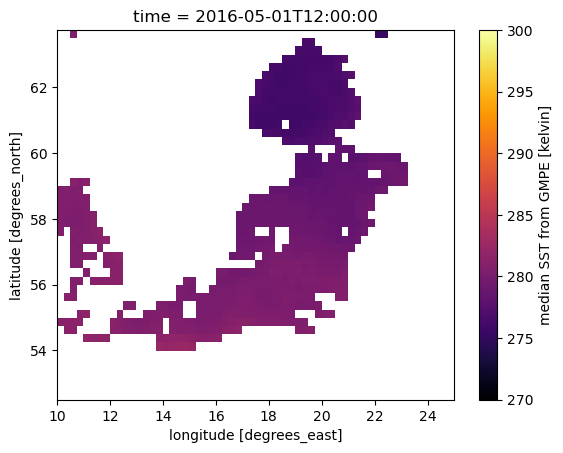

In [6]:
dataset_baltic.analysed_sst.isel(time=0).plot.imshow(vmin=270, vmax=300, cmap="inferno")

---
**Scenario 1**: Open xcube Viewer for a dataset instances opened or otherwise created in this Notebook (in-memory datasets).

We create the viewer with a configuration that defines the color mapping style `SST`.

In [7]:
viewer = Viewer(server_config={
    "Styles": [
        {
            "Identifier": "SST",
            "ColorMappings": {
                "analysed_sst": {
                    "ValueRange": [270, 300],
                    "ColorBar": "inferno"
                }
            }
        }
    ]
})

Then we add our datasets using the style `SST`.

In [8]:
viewer.add_dataset(dataset, style="SST")
viewer.add_dataset(dataset_baltic, style="SST")

'81c0a600-c197-42f0-810e-4b3440b9ee86'

You can click on the viewer link to open xcube Viewer in a new browser tab:

In [9]:
viewer.info()

Server: http://localhost:8888/proxy/8000
Viewer: http://localhost:8888/proxy/8000/viewer/?serverUrl=http://localhost:8888/proxy/8000


You can also open xcube Viewer inlined here:

In [10]:
viewer.show()

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 3.50ms


---
**Scenario 2**: Open xcube Viewer for a dataset instances persisted in this Notebooks's workspace or from other sources (saved datasets).

In [11]:
dataset_baltic.to_zarr("baltic.zarr", mode="w", safe_chunks=False)

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 1.52ms


Now, open the JupyterLab Launcher, and select _xcube Viewer_. You should see the dataset titled "SST Baltic May/June 2016". 

You should now find two new files in your workspace, [xcube-server.yaml](./xcube-server.yaml) and [xcube-server.log](./xcube-server.log). 
The first one is the configuration file used by xcube Server and therefore determines what datasets are shown in xcube Viewer. 
The second is the server's log file which is useful for debugging, for example, you may find details here why a certain dataset is not displayed.  

Note, currently [xcube-server.yaml](./xcube-server.yaml) only applies to the server/viewer launched by the JupyterLab Launcher. It is independent from the server/viewer created from within Notebooks.